In [56]:
include("../../src/WaterLily.jl")
WaterLily = Main.WaterLily;
using Plots; gr()
using StaticArrays
using JLD
using Images
using FFTW
using Statistics
using Interpolations
using DelimitedFiles
using LinearAlgebra
using PyPlot
using GLMakie
GLMakie.activate!()
using PlotlyJS

In [57]:
inside(a::AbstractArray) = CartesianIndices(map(ax->first(ax)+1:last(ax)-1,axes(a)))
@inline CI(a...) = CartesianIndex(a...)
"""
    δ(i,N::Int)
    δ(i,I::CartesianIndex{N}) where {N}

Return a CartesianIndex of dimension `N` which is one at index `i` and zero elsewhere.
"""
δ(i,::Val{N}) where N = CI(ntuple(j -> j==i ? 1 : 0, N))
δ(i,I::CartesianIndex{N}) where N = δ(i, Val{N}())


δ (generic function with 2 methods)

In [58]:
function IntVol(n1,n2,n3,f)
    return f - WaterLily.vof_vol(n1,n2,n3,WaterLily.vof_int(n1,n2,n3,f))
end
function VolInt(n1,n2,n3,α)
    return f - WaterLily.vof_int(n1,n2,n3,WaterLily.vof_vol(n1,n2,n3,α))
end

VolInt (generic function with 1 method)

In [59]:
abs(IntVol(1.0,2.0,3.1,0.7))-eps(Float64)

1.1102230246251565e-16

In [60]:
IntVol(1.0,2.0,3.1,0.2)-eps(Float64)

0.0

In [61]:
WaterLily.vof_vol(1,1,1,0)

0.0

In [62]:
α = 0:0.01:3
vol = WaterLily.vof_vol.(1,1,1,α);

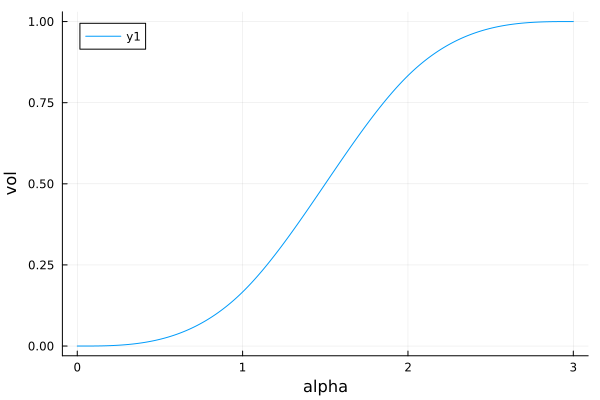

In [67]:
Plots.plot(α,vol)
Plots.plot!(xlabel="alpha",ylabel="vol")

In [64]:
10000000000eps(Float64)

2.220446049250313e-6

In [65]:
WaterLily.vof_int(1,1,1,1-1e-10)-3

-0.0008434326885637944

In [66]:
IntVol(1,1,1,1-1e-7)

0.0